In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from src.env.pendulum_env import PendulumEnv
from src.dataset.dynamics_dataset import DynamicsDataset
from src.model.dynamics_model import DirectDynamicsModel, ResidualDynamicsModel
from collect_data import collect_data
from train_model import train_model, eval_model

In [30]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 14
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["figure.dpi"] = 100

In [5]:
# Create environment
# env = PendulumEnv()
# Collect data
dataset = torch.load("dynamics_dataset.pt", weights_only=False)
print(f"Collected {len(dataset)} samples.")

Collected 1000 samples.


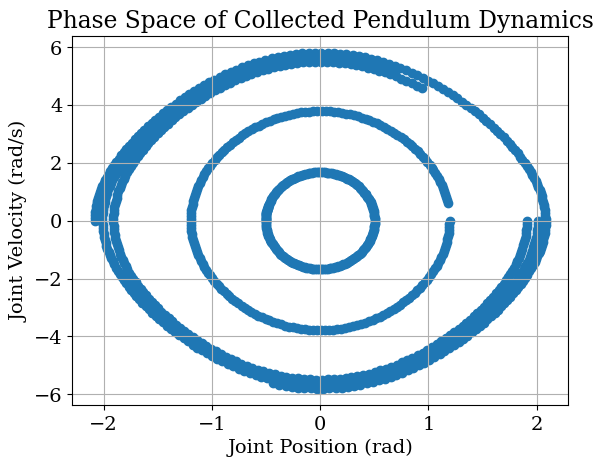

In [31]:
joint_pos = dataset.states[:, 0].numpy()
joint_vel = dataset.states[:, 1].numpy()

plt.scatter(joint_pos, joint_vel)
plt.xlabel("Joint Position (rad)")
plt.ylabel("Joint Velocity (rad/s)")
plt.title("Phase Space of Collected Pendulum Dynamics")
plt.grid()
plt.show()

In [7]:
# Load trained models
direct_model = DirectDynamicsModel(state_dim=2, action_dim=1, hidden_dim=64)
direct_model.load_state_dict(torch.load("direct_dynamics_model.pt"))
residual_model = ResidualDynamicsModel(state_dim=2, action_dim=1, hidden_dim=64)
residual_model.load_state_dict(torch.load("residual_dynamics_model.pt"))

<All keys matched successfully>

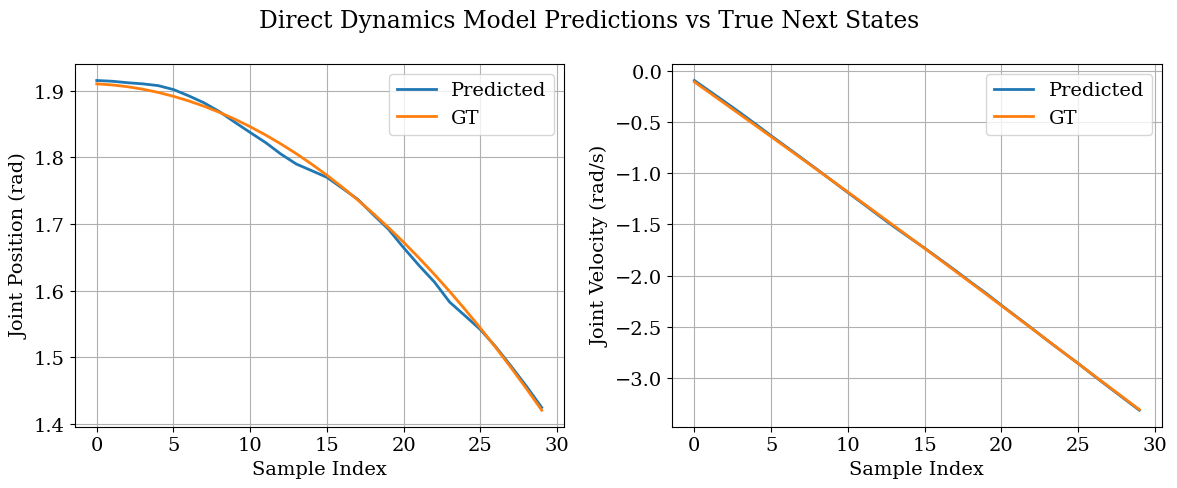

In [32]:
with torch.no_grad():
    pred_state = direct_model(dataset.states, dataset.actions)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(pred_state[:30, 0].numpy(), label="Predicted")
ax[0].plot(dataset.next_states[:30, 0].numpy(), label="GT")
ax[0].legend()
ax[0].set_xlabel("Sample Index")
ax[0].set_ylabel("Joint Position (rad)")
ax[0].grid()
ax[1].plot(pred_state[:30, 1].numpy(), label="Predicted")
ax[1].plot(dataset.next_states[:30, 1].numpy(), label="GT")
ax[1].legend()
ax[1].set_xlabel("Sample Index")
ax[1].set_ylabel("Joint Velocity (rad/s)")
ax[1].grid()
fig.suptitle("Direct Dynamics Model Predictions vs True Next States")
plt.tight_layout()
plt.show()

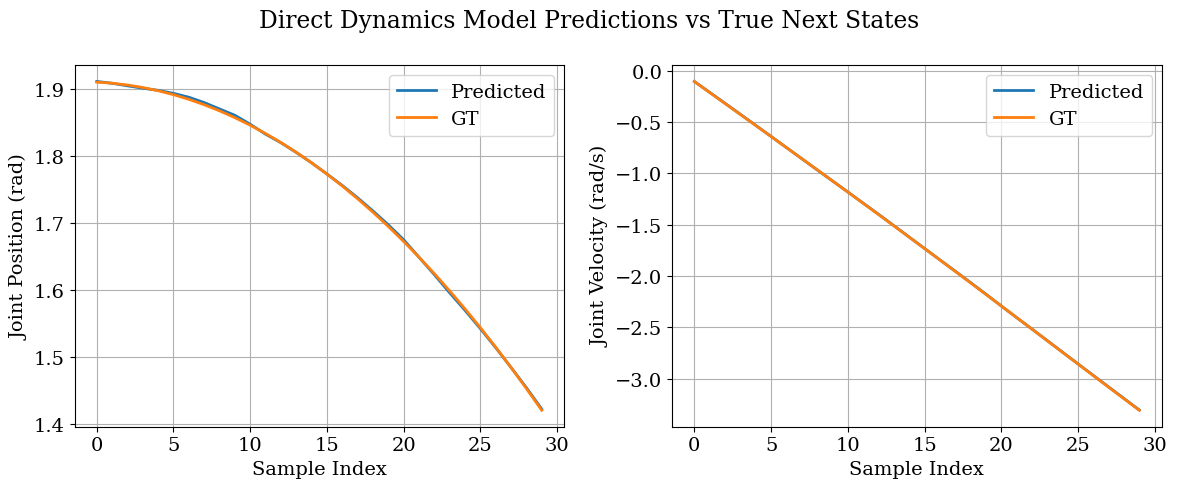

In [27]:
with torch.no_grad():
    pred_state = residual_model(dataset.states, dataset.actions)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(pred_state[:30, 0].numpy(), label="Predicted")
ax[0].plot(dataset.next_states[:30, 0].numpy(), label="GT")
ax[0].legend()
ax[0].set_xlabel("Sample Index")
ax[0].set_ylabel("Joint Position (rad)")
ax[0].grid()
ax[1].plot(pred_state[:30, 1].numpy(), label="Predicted")
ax[1].plot(dataset.next_states[:30, 1].numpy(), label="GT")
ax[1].legend()
ax[1].set_xlabel("Sample Index")
ax[1].set_ylabel("Joint Velocity (rad/s)")
ax[1].grid()
fig.suptitle("Direct Dynamics Model Predictions vs True Next States")
plt.tight_layout()
plt.show()